In [1]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense 
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() 
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3)) 
x = GlobalAveragePooling2D()(base_model.output)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

9406464/9406464 [==============================] - 8s 1us/step


In [4]:
# Freeze base model layers 
base_model.trainable = False

In [5]:
# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [6]:
# Train model
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 43s 26ms/step - loss: 2.0519 - accuracy: 0.2779 - val_loss: 1.9622 - val_accuracy: 0.2979
Epoch 2/5
1563/1563 [==============================] - 36s 23ms/step - loss: 1.9311 - accuracy: 0.3090 - val_loss: 1.9225 - val_accuracy: 0.3079
Epoch 3/5
1563/1563 [==============================] - 39s 25ms/step - loss: 1.9033 - accuracy: 0.3174 - val_loss: 1.9083 - val_accuracy: 0.3112
Epoch 4/5
1563/1563 [==============================] - 38s 24ms/step - loss: 1.8904 - accuracy: 0.3194 - val_loss: 1.9034 - val_accuracy: 0.3097
Epoch 5/5
1563/1563 [==============================] - 39s 25ms/step - loss: 1.8833 - accuracy: 0.3198 - val_loss: 1.8983 - val_accuracy: 0.3139


1/1 [==============================] - 1s 994ms/step


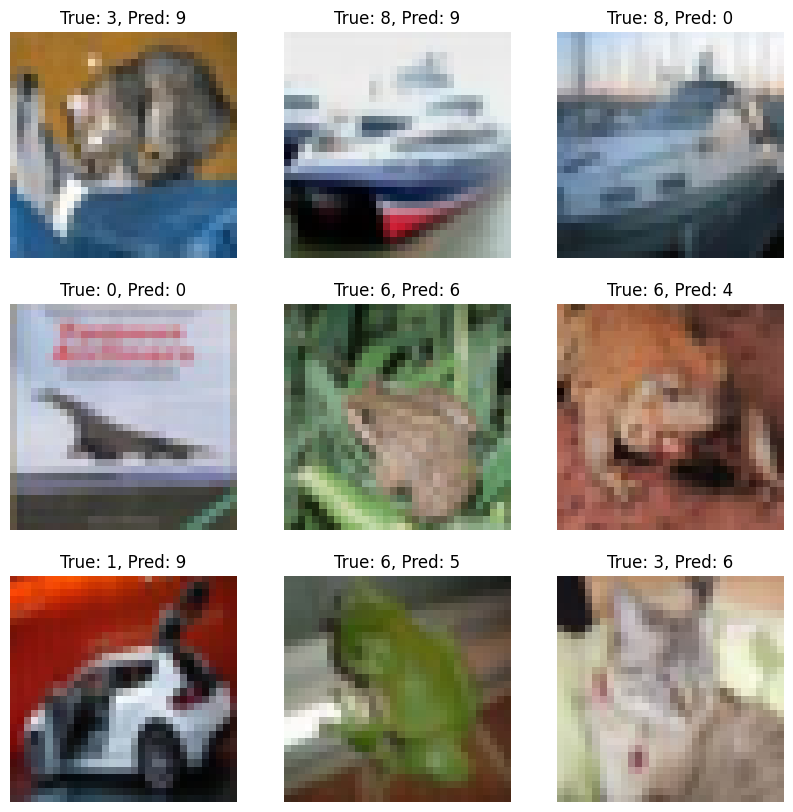

In [7]:
# Predict and visualize some test images 
predictions = model.predict(x_test[:9]) 
plt.figure(figsize=(10, 10))
for i in range(9): 
    plt.subplot(3, 3, i+1) 
    plt.imshow(x_test[i])
    plt.title(f"True: {y_test[i][0]}, Pred: {predictions[i].argmax()}") 
    plt.axis('off')
plt.show()